In [1]:
from __future__ import print_function
import sdm as sdmlib
from sdm import utils
import numpy as np
import matplotlib.mlab as mlab
from IPython.display import clear_output
import matplotlib.pyplot as plt

In [3]:
bits, radius = 1000, 451
#bits, radius = 256, 103

p = utils.calculate_probability(bits, radius)

sample = 1000000
scanner_type = sdmlib.SDM_SCANNER_OPENCL

address_space = sdmlib.AddressSpace.init_random(bits, sample)
address_space.opencl_init();

In [4]:
p

0.001071850048924452

In [5]:
counter = []

In [41]:
for i in range(100):
    if i%100 == 0:
        clear_output(wait=True)
        print(i)
    bs = sdmlib.Bitstring.init_random(bits)
    result = address_space.scan_opencl2(bs, radius)
    for idx in result:
        bs2 = address_space.get_bitstring(idx)
        counter.append(bs.distance_to(bs2))

0


In [42]:
from math import factorial
comb = lambda a, b: factorial(a)/factorial(b)/factorial(a-b)
acc = [0]
for i in xrange(radius+1):
    acc.append(acc[-1] + comb(bits, i))
acc = acc[1:]

In [72]:
x = []
y = []
for d in range(0, radius+1):
    x.append(d + 0.5)
    y.append(((1.0*comb(bits, d)) / acc[radius]))

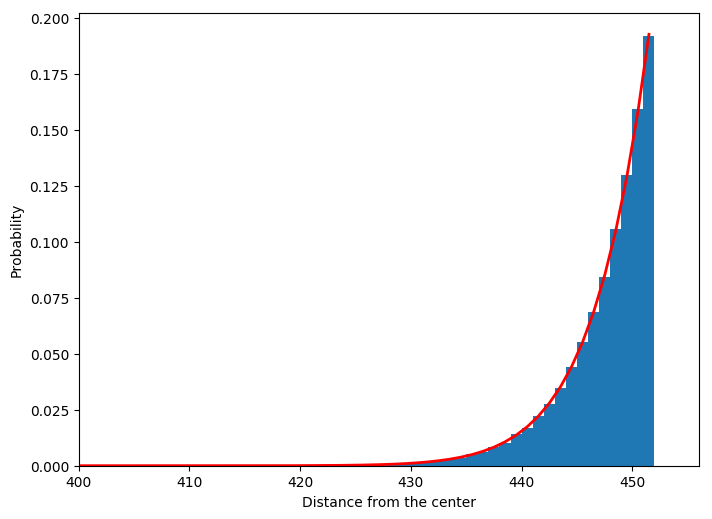

In [73]:
plt.figure(figsize=(8, 6), dpi=100)
plt.hist(counter, bins=range(0, radius+2), density=True)
plt.plot(x, y, 'r', linewidth=2.0)
plt.xlim(400, radius+5)
plt.ylabel('Probability')
plt.xlabel('Distance from the center')
plt.show()

In [74]:
from math import log
I = [-log(p)/log(2) if p > 0 else 0 for p in y]

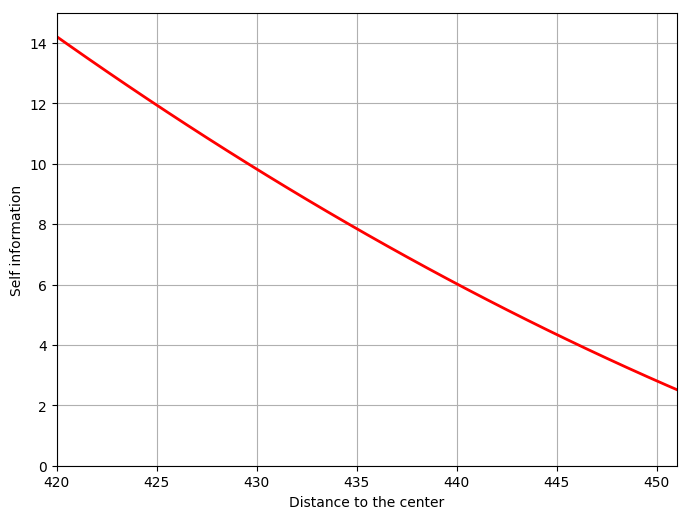

In [82]:
plt.figure(figsize=(8, 6), dpi=100)
plt.plot(x, I, 'r', linewidth=2.0)
plt.xlim(420, radius)
plt.ylim(0, 15)
plt.ylabel('Self information')
plt.xlabel('Distance to the center')
plt.grid()
plt.show()

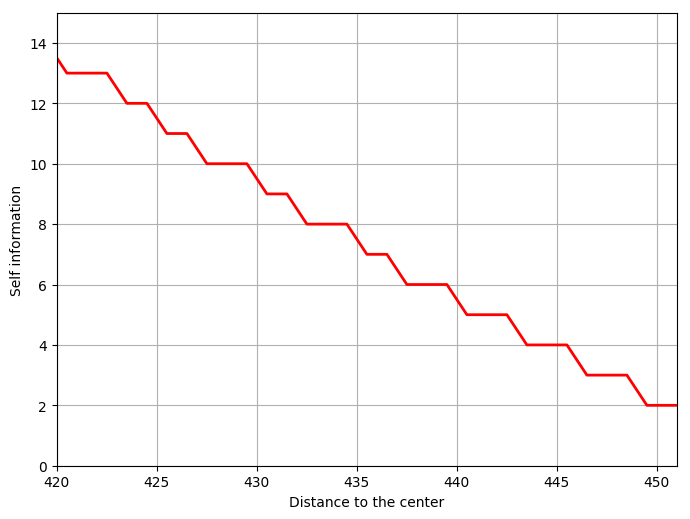

In [83]:
plt.figure(figsize=(8, 6), dpi=100)
plt.plot(x, [int(p) for p in I], 'r', linewidth=2.0)
plt.xlim(420, radius)
plt.ylim(0, 15)
plt.ylabel('Self information')
plt.xlabel('Distance to the center')
plt.grid()
plt.show()

In [84]:
I[-1]

2.3753165837275243

In [87]:
1.0*int(I[420]) / int(I[-1])

6.5

In [88]:
repr([int(p) for p in I])

'[990, 980, 971, 962, 954, 947, 939, 932, 925, 918, 912, 905, 899, 893, 887, 881, 875, 869, 863, 857, 852, 846, 841, 835, 830, 825, 819, 814, 809, 804, 799, 794, 789, 784, 779, 775, 770, 765, 761, 756, 751, 747, 742, 738, 733, 729, 725, 720, 716, 712, 707, 703, 699, 695, 691, 687, 682, 678, 674, 670, 666, 662, 659, 655, 651, 647, 643, 639, 636, 632, 628, 624, 621, 617, 613, 610, 606, 603, 599, 595, 592, 588, 585, 581, 578, 575, 571, 568, 564, 561, 558, 554, 551, 548, 544, 541, 538, 535, 532, 528, 525, 522, 519, 516, 513, 510, 507, 503, 500, 497, 494, 491, 488, 485, 482, 479, 477, 474, 471, 468, 465, 462, 459, 456, 454, 451, 448, 445, 442, 440, 437, 434, 431, 429, 426, 423, 421, 418, 415, 413, 410, 408, 405, 402, 400, 397, 395, 392, 390, 387, 385, 382, 380, 377, 375, 372, 370, 367, 365, 363, 360, 358, 355, 353, 351, 348, 346, 344, 341, 339, 337, 335, 332, 330, 328, 326, 323, 321, 319, 317, 314, 312, 310, 308, 306, 304, 302, 299, 297, 295, 293, 291, 289, 287, 285, 283, 281, 279, 277, 275